# Working with Data

In [1]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt

#Definir las rutas de los directorios 
from pathlib import Path
current_dir = Path('.').resolve()
project_dir = Path(current_dir).parent

In [2]:
query = """
 SELECT 
    *
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` 
LIMIT 1000
"""
df = pd.read_gbq(query)
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,1635cc78e071c55379ba87d3d275a4f21333d213,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:30:00+00:00,2016-09-22 11:45:00+00:00,600,0.8,<NA>,<NA>,<NA>,<NA>,...,0.0,9.25,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
1,1e3168900f8090e1bab555b15210f6ad701af327,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:45:00+00:00,2016-09-22 12:00:00+00:00,960,7.6,<NA>,<NA>,<NA>,<NA>,...,0.0,21.50,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
2,c620405438b7bfcc6378f885f6aa56d1b8be9369,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 15:00:00+00:00,2016-09-22 15:45:00+00:00,3000,13.2,<NA>,<NA>,<NA>,<NA>,...,0.0,37.00,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
3,c8b56b9c599580efc1e4ffe36ac36cfb7ea85cbd,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 17:15:00+00:00,2016-09-22 17:45:00+00:00,2220,12.2,<NA>,<NA>,<NA>,<NA>,...,4.5,46.58,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
4,c876619a0a2869039533144d7105948e9cfc1951,1158f25979ad78fd3dafc867a540ad761b65922c312e61...,2016-09-19 21:00:00+00:00,2016-09-19 21:30:00+00:00,1560,15.6,<NA>,<NA>,<NA>,<NA>,...,4.0,52.40,Credit Card,Sun Taxi,NaN,NaN,None,NaN,NaN,None


# Explore your data

In [3]:
# Get only numeric columns
numerics = ['int16','int32', 'int64', 'float16', 'float32', 'float64']

num_df = df.select_dtypes (include=numerics)
num_df.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,600,0.8,<NA>,<NA>,<NA>,<NA>,6.75,2.00,0.0,0.0,9.25,NaN,NaN,NaN,NaN
1,960,7.6,<NA>,<NA>,<NA>,<NA>,21.50,0.00,0.0,0.0,21.50,NaN,NaN,NaN,NaN
2,3000,13.2,<NA>,<NA>,<NA>,<NA>,37.00,0.00,0.0,0.0,37.00,NaN,NaN,NaN,NaN
3,2220,12.2,<NA>,<NA>,<NA>,<NA>,35.50,6.08,0.0,4.5,46.58,NaN,NaN,NaN,NaN
4,1560,15.6,<NA>,<NA>,<NA>,<NA>,39.25,8.65,0.0,4.0,52.40,NaN,NaN,NaN,NaN


In [4]:
num_df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1000.000000,1000.000000,0,0,0,0,1000.000000,1000.000000,907.0,1000.000000,1000.000000,0.0,0.0,0.0,0.0
mean,827.440000,6.726440,<NA>,<NA>,<NA>,<NA>,13.628910,1.578080,0.0,0.970000,16.376990,NaN,NaN,NaN,NaN
std,803.937998,18.950691,<NA>,<NA>,<NA>,<NA>,13.689976,2.675334,0.0,3.560024,16.965577,NaN,NaN,NaN,NaN
min,0.000000,0.000000,<NA>,<NA>,<NA>,<NA>,0.010000,0.000000,0.0,0.000000,0.010000,NaN,NaN,NaN,NaN
25%,347.500000,1.000000,<NA>,<NA>,<NA>,<NA>,6.000000,0.000000,0.0,0.000000,7.250000,NaN,NaN,NaN,NaN
50%,600.000000,1.900000,<NA>,<NA>,<NA>,<NA>,8.500000,0.000000,0.0,0.000000,10.250000,NaN,NaN,NaN,NaN
75%,960.000000,5.725000,<NA>,<NA>,<NA>,<NA>,14.762500,2.000000,0.0,1.000000,17.500000,NaN,NaN,NaN,NaN
max,6240.000000,195.900000,<NA>,<NA>,<NA>,<NA>,145.000000,20.000000,0.0,72.000000,217.000000,NaN,NaN,NaN,NaN


# One-dimensional data

<AxesSubplot:>

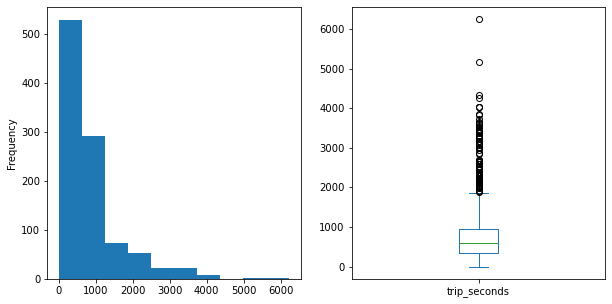

In [5]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
num_df['trip_seconds'].plot(kind='hist', bins=10, ax=ax[0])
num_df['trip_seconds'].plot(kind='box',           ax=ax[1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


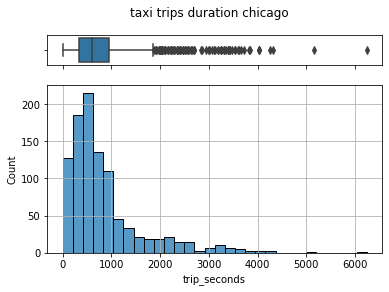

In [6]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["trip_seconds"], ax=ax_box)
sns.histplot(data=num_df, x="trip_seconds", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-duration-chicago')
#f.savefig(plot_path)

# Log-Transform

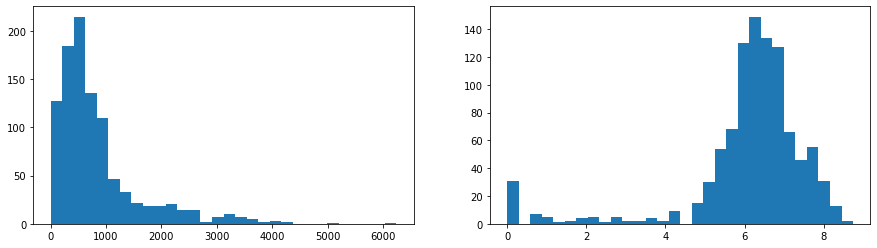

In [7]:
x    = num_df['trip_seconds']
log_x= np.log(x+1)

f, ax= plt.subplots(1,2,  figsize=(15, 4))

ax[0].hist(x,     bins=30)
ax[1].hist(log_x, bins=30);


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_seconds'>

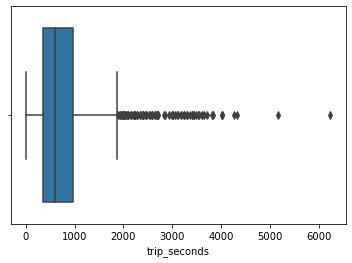

In [8]:
sns.boxplot(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_seconds'>

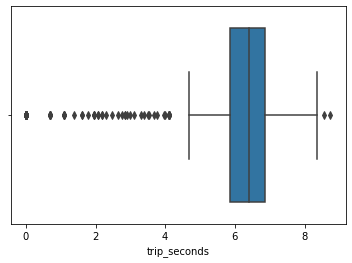

In [9]:
sns.boxplot(log_x)

In [10]:
2.78**log_x.mean()

512.1480762581558

In [11]:
np.exp(log_x.mean())

446.58359990923947

# Two dimensions

(0.0, 50.0)

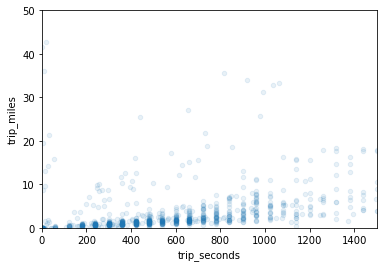

In [12]:
num_df.plot(kind='scatter', x='trip_seconds', y='trip_miles', alpha=0.1)
plt.xlim(0,1500)
plt.ylim(0,50)

In [13]:
x='trip_seconds'
y='trip_miles'
num_df[[x,y]].corr()

,trip_seconds,trip_miles
trip_seconds,1.000000,0.388041
trip_miles,0.388041,1.000000


# Log Transform

<AxesSubplot:xlabel='trip_seconds', ylabel='trip_miles'>

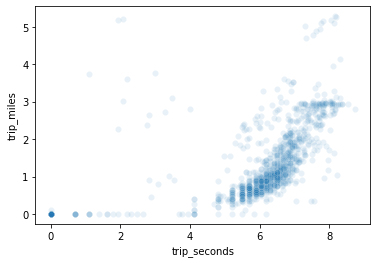

In [14]:
log_x = np.log(num_df[x] +1)
log_y = np.log(num_df[y] +1)
sns.scatterplot(x=log_x, y=log_y, alpha=0.1)

In [15]:
log_num_df = pd.DataFrame(
    columns=[x, y]
)

log_num_df[x] = log_x
log_num_df[y] = log_y

log_num_df.corr()

,trip_seconds,trip_miles
trip_seconds,1.000000,0.543457
trip_miles,0.543457,1.000000


# Many Dimensions

. Scatter matrix

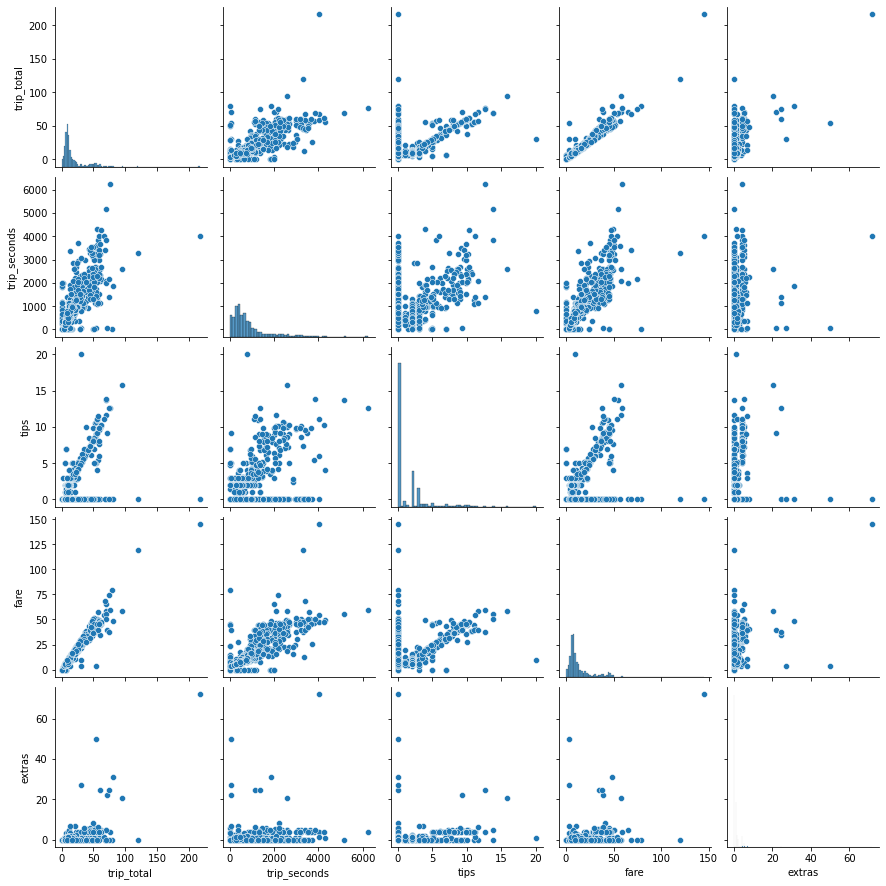

In [16]:
cols = ['trip_total', 'trip_seconds', 'tips', 'fare', 'extras']
sns.pairplot(data=num_df[cols])
        

<AxesSubplot:>

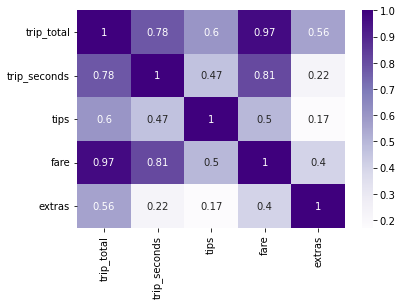

In [17]:
correlations = num_df[cols].corr()

sns.heatmap(correlations, cmap='Purples',  annot=True)

# Manipulating Data

# .Rescaling
# .MinMax Scaler
# .Standard Scaler

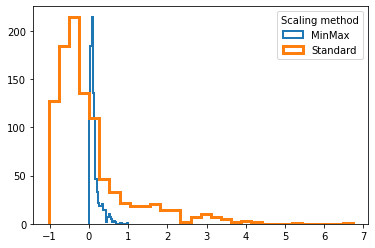

In [18]:
x =     num_df['trip_seconds']
x_min = x.min()
x_max = x.max()

x_mean = x.mean()
x_std  = x.std()

x_min_max_scaled = (x-x_min)/(x_max - x_min) #MinMaxScaler
x_std_scaled   = (x-x_mean)/x_std

plt.hist(x_min_max_scaled, bins=30, label ='MinMax',   histtype='step', lw=2)
plt.hist(x_std_scaled,     bins=30, label ='Standard', histtype='step', lw=3);

plt.legend(title='Scaling method')

In [19]:
num_df['trip_seconds'].max()


6240

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
                                                

In [21]:
minmax_scaler = MinMaxScaler().fit(num_df[cols])
data_min_max_scaled = minmax_scaler.transform(num_df[cols])


In [22]:
num_df[cols].values

array([[9.25, 600, 2.0, 6.75, 0.0],
       [21.5, 960, 0.0, 21.5, 0.0],
       [37.0, 3000, 0.0, 37.0, 0.0],
       ...,
       [23.3, 1260, 3.8, 19.0, 0.0],
       [9.25, 720, 0.0, 9.25, 0.0],
       [16.25, 960, 0.0, 16.25, 0.0]], dtype=object)

In [23]:
data_min_max_scaled

array([[0.04258261, 0.09615385, 0.1       , 0.04648596, 0.        ],
       [0.09903682, 0.15384615, 0.        , 0.14821712, 0.        ],
       [0.17046869, 0.48076923, 0.        , 0.25512104, 0.        ],
       ...,
       [0.10733214, 0.20192308, 0.19      , 0.13097455, 0.        ],
       [0.04258261, 0.11538462, 0.        , 0.06372853, 0.        ],
       [0.07484216, 0.15384615, 0.        , 0.11200772, 0.        ]])

In [24]:
num_df_minmax_scaled =pd.DataFrame(
    columns = num_df[cols].columns,
    data = data_min_max_scaled
)
num_df_minmax_scaled.head()

,trip_total,trip_seconds,tips,fare,extras
0,0.042583,0.096154,0.1000,0.046486,0.000000
1,0.099037,0.153846,0.0000,0.148217,0.000000
2,0.170469,0.480769,0.0000,0.255121,0.000000
3,0.214618,0.355769,0.3040,0.244776,0.062500
4,0.241440,0.250000,0.4325,0.270639,0.055556


In [25]:
num_df_minmax_scaled.describe()

,trip_total,trip_seconds,tips,fare,extras
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.075427,0.132603,0.078904,0.093930,0.013472
std,0.078186,0.128836,0.133767,0.094420,0.049445
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033366,0.055689,0.000000,0.041313,0.000000
50%,0.047191,0.096154,0.000000,0.058556,0.000000
75%,0.080603,0.153846,0.100000,0.101748,0.013889
max,1.000000,1.000000,1.000000,1.000000,1.000000


# 1. Graficos variables Númericas

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


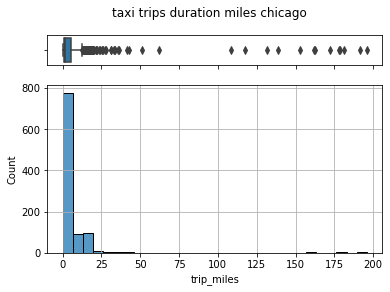

In [26]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(num_df["trip_miles"], ax=ax_box)
sns.histplot(data=num_df, x="trip_miles", bins=30, ax=ax_hist)
 
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration miles chicago')
ax_hist.grid()

plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-duration-miles-chicago')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


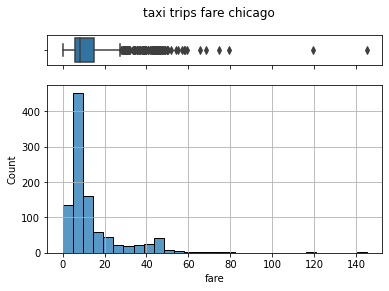

In [27]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(num_df["fare"], ax=ax_box)
sns.histplot(data=num_df, x="fare", bins=30, ax=ax_hist)
 
ax_box.set(xlabel='')

plt.suptitle ('taxi trips fare chicago')
ax_hist.grid()

plot_path = os.path.join(project_dir, 'reports', 'plots', '-taxi-trips-fare-chicago')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


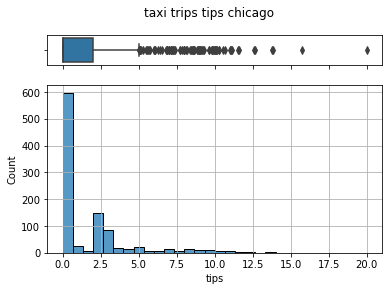

In [28]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(num_df["tips"], ax=ax_box)
sns.histplot(data=num_df, x="tips", bins=30, ax=ax_hist)
 
ax_box.set(xlabel='')

plt.suptitle ('taxi trips tips chicago')
ax_hist.grid()

plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trips-tips-chicago')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


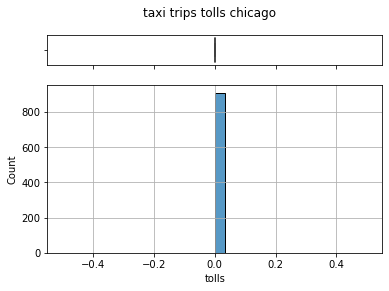

In [29]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(num_df["tolls"], ax=ax_box)
sns.histplot(data=num_df, x="tolls", bins=30, ax=ax_hist)
 
ax_box.set(xlabel='')

plt.suptitle ('taxi trips tolls chicago')
ax_hist.grid()

plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trips-tolls-chicago')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


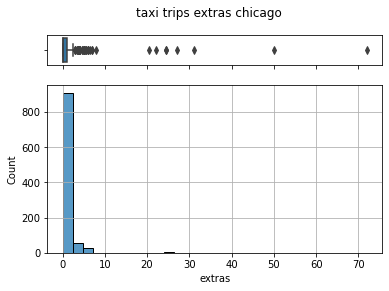

In [30]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(num_df["extras"], ax=ax_box)
sns.histplot(data=num_df, x="extras", bins=30, ax=ax_hist)
 
ax_box.set(xlabel='')

plt.suptitle ('taxi trips extras chicago')
ax_hist.grid()

plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trips-extras-chicago')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


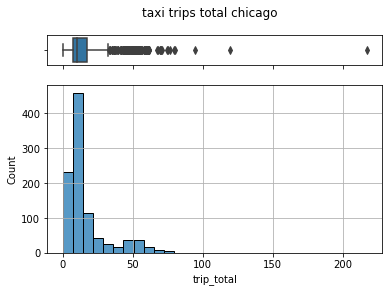

In [31]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(num_df["trip_total"], ax=ax_box)
sns.histplot(data=num_df, x="trip_total", bins=30, ax=ax_hist)
 
ax_box.set(xlabel='')

plt.suptitle ('taxi trips total chicago')
ax_hist.grid()

plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trips-total-chicago')

# 2. Correlaciones Diagramas de Dispersión

(0.0, 50.0)

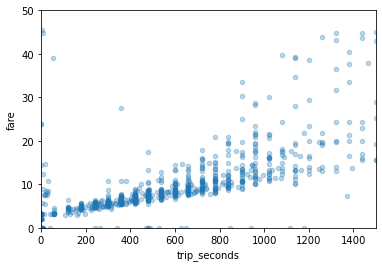

In [32]:
num_df.plot(kind='scatter', x='trip_seconds', y='fare', alpha=0.3)
plt.xlim(0,1500)
plt.ylim(0,50)

In [33]:
x='trip_seconds'
y='fare'
num_df[[x,y]].corr()

,trip_seconds,fare
trip_seconds,1.000000,0.811545
fare,0.811545,1.000000


(0.0, 50.0)

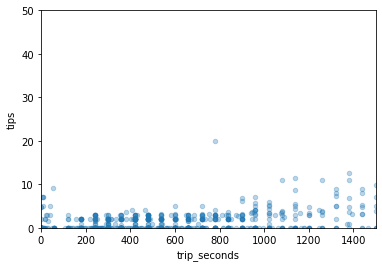

In [34]:
num_df.plot(kind='scatter', x='trip_seconds', y='tips', alpha=0.3)
plt.xlim(0,1500)
plt.ylim(0,50)

In [35]:
x='trip_seconds'
y='tips'
num_df[[x,y]].corr()

,trip_seconds,tips
trip_seconds,1.000000,0.465293
tips,0.465293,1.000000


(0.0, 50.0)

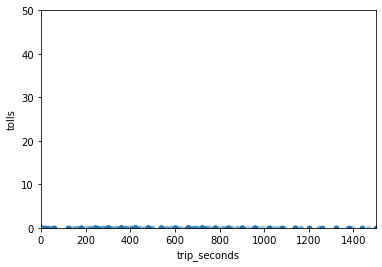

In [36]:
num_df.plot(kind='scatter', x='trip_seconds', y='tolls', alpha=0.3)
plt.xlim(0,1500)
plt.ylim(0,50)

In [37]:
x='trip_seconds'
y='tolls'
num_df[[x,y]].corr()

,trip_seconds,tolls
trip_seconds,1.0,NaN
tolls,NaN,NaN


(0.0, 50.0)

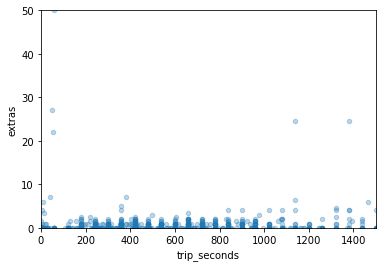

In [38]:
num_df.plot(kind='scatter', x='trip_seconds', y='extras', alpha=0.3)
plt.xlim(0,1500)
plt.ylim(0,50)

In [39]:
x='trip_seconds'
y='extras'
num_df[[x,y]].corr()

,trip_seconds,extras
trip_seconds,1.000000,0.223759
extras,0.223759,1.000000


(0.0, 50.0)

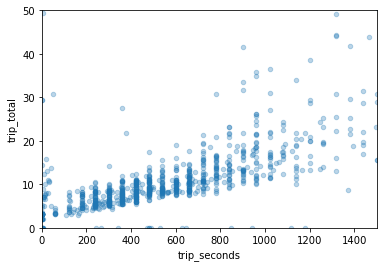

In [40]:
num_df.plot(kind='scatter', x='trip_seconds', y='trip_total', alpha=0.3)
plt.xlim(0,1500)
plt.ylim(0,50)

In [41]:
x='trip_seconds'
y='trip_total'
num_df[[x,y]].corr()

,trip_seconds,trip_total
trip_seconds,1.000000,0.777201
trip_total,0.777201,1.000000


# 3. Scatter Matrix /Mapa de Calor 

In [42]:
a='trip_seconds'
b='trip_miles'
c='trip_total'
d='tips'
e='fare'
f='extras'

num_df[[a,b,c,d,e,f]]
num_df[[a,b,c,d,e,f]].corr()

,trip_seconds,trip_miles,trip_total,tips,fare,extras
trip_seconds,1.000000,0.388041,0.777201,0.465293,0.811545,0.223759
trip_miles,0.388041,1.000000,0.438722,0.066270,0.483143,0.188213
trip_total,0.777201,0.438722,1.000000,0.601553,0.971256,0.561654
tips,0.465293,0.066270,0.601553,1.000000,0.495063,0.170404
fare,0.811545,0.483143,0.971256,0.495063,1.000000,0.401036
extras,0.223759,0.188213,0.561654,0.170404,0.401036,1.000000


In [43]:
log_num_df = pd.DataFrame(
    columns=[a,b,c,d,e,f]
)

log_a = np.log(num_df[[a]]+1)
log_b = np.log(num_df[[b]]+1)
log_c = np.log(num_df[[c]]+1)
log_d = np.log(num_df[[d]]+1)
log_e = np.log(num_df[[e]]+1)
log_f = np.log(num_df[[f]]+1)


log_num_df[a] =log_a
log_num_df[b] =log_b
log_num_df[c] =log_c
log_num_df[d] =log_d
log_num_df[e] =log_e
log_num_df[f] =log_f

log_num_df.corr()


,trip_miles,trip_total,tips,fare,extras
trip_miles,1.000000,0.702480,0.230533,0.741938,0.344184
trip_total,0.702480,1.000000,0.516821,0.959970,0.476833
tips,0.230533,0.516821,1.000000,0.369492,0.235966
fare,0.741938,0.959970,0.369492,1.000000,0.372694
extras,0.344184,0.476833,0.235966,0.372694,1.000000


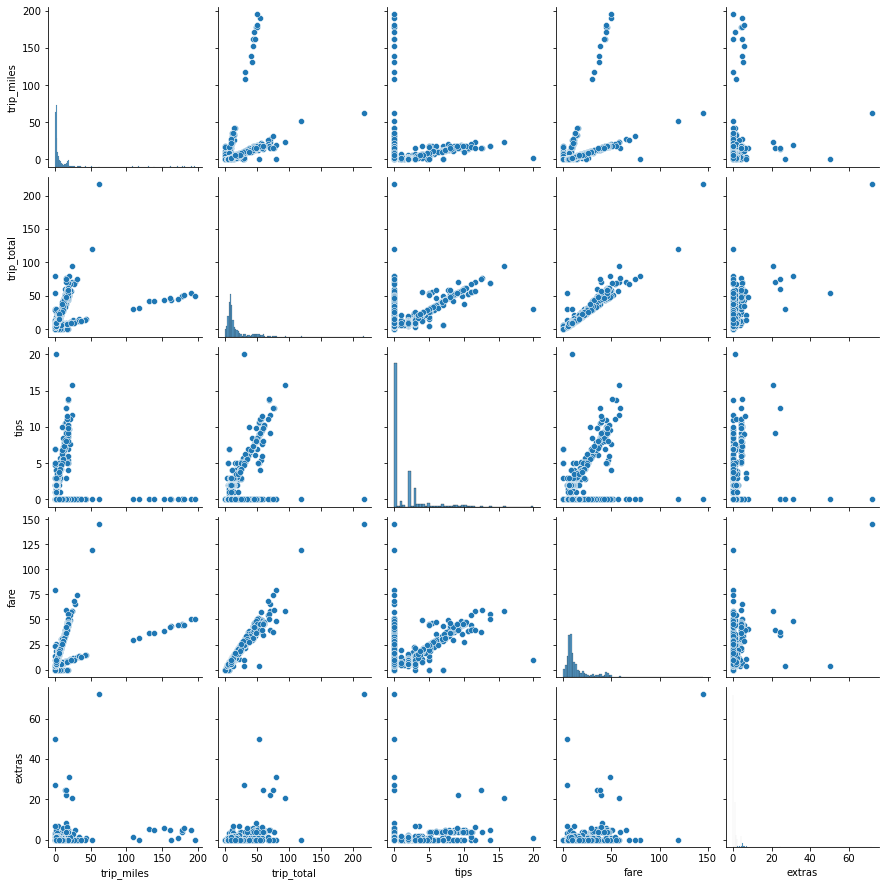

In [44]:
cols1 = ['trip_miles', 'trip_total', 'tips', 'fare', 'extras']
sns.pairplot(data=num_df[cols1])

<AxesSubplot:>

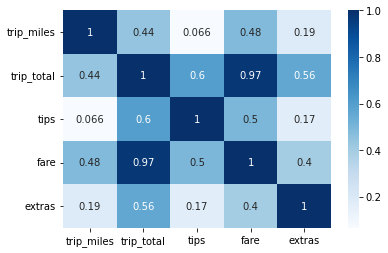

In [45]:
correlations = num_df[cols1].corr()

sns.heatmap(correlations, cmap='Blues',  annot=True)

# 4. Correlaciones MinMax Scaled/ Standar Scaled

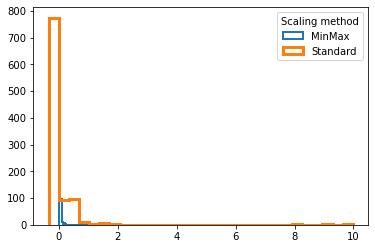

In [46]:
x =     num_df['trip_miles']
x_min = x.min()
x_max = x.max()

x_mean = x.mean()
x_std  = x.std()

x_min_max_scaled = (x-x_min)/(x_max - x_min) #MinMaxScaler
x_std_scaled   = (x-x_mean)/x_std

plt.hist(x_min_max_scaled, bins=30, label ='MinMax',   histtype='step', lw=2)
plt.hist(x_std_scaled,     bins=30, label ='Standard', histtype='step', lw=3);

plt.legend(title='Scaling method')

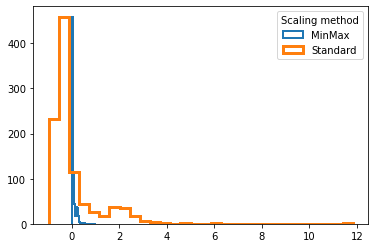

In [48]:
x =     num_df['trip_total']
x_min = x.min()
x_max = x.max()

x_mean = x.mean()
x_std  = x.std()

x_min_max_scaled = (x-x_min)/(x_max - x_min) #MinMaxScaler
x_std_scaled   = (x-x_mean)/x_std

plt.hist(x_min_max_scaled, bins=30, label ='MinMax',   histtype='step', lw=2)
plt.hist(x_std_scaled,     bins=30, label ='Standard', histtype='step', lw=3);

plt.legend(title='Scaling method')

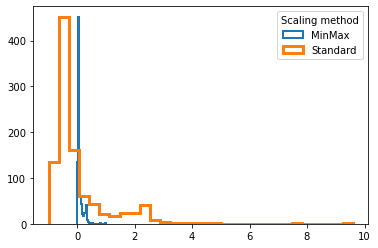

In [49]:
x =     num_df['fare']
x_min = x.min()
x_max = x.max()

x_mean = x.mean()
x_std  = x.std()

x_min_max_scaled = (x-x_min)/(x_max - x_min) #MinMaxScaler
x_std_scaled   = (x-x_mean)/x_std

plt.hist(x_min_max_scaled, bins=30, label ='MinMax',   histtype='step', lw=2)
plt.hist(x_std_scaled,     bins=30, label ='Standard', histtype='step', lw=3);

plt.legend(title='Scaling method')

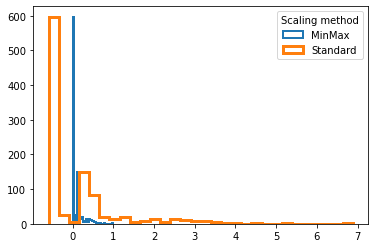

In [50]:
x =     num_df['tips']
x_min = x.min()
x_max = x.max()

x_mean = x.mean()
x_std  = x.std()

x_min_max_scaled = (x-x_min)/(x_max - x_min) #MinMaxScaler
x_std_scaled   = (x-x_mean)/x_std

plt.hist(x_min_max_scaled, bins=30, label ='MinMax',   histtype='step', lw=2)
plt.hist(x_std_scaled,     bins=30, label ='Standard', histtype='step', lw=3);

plt.legend(title='Scaling method')

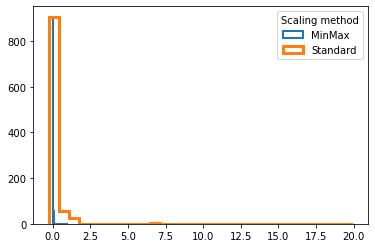

In [52]:
x =     num_df['extras']
x_min = x.min()
x_max = x.max()

x_mean = x.mean()
x_std  = x.std()

x_min_max_scaled = (x-x_min)/(x_max - x_min) #MinMaxScaler
x_std_scaled   = (x-x_mean)/x_std

plt.hist(x_min_max_scaled, bins=30, label ='MinMax',   histtype='step', lw=2)
plt.hist(x_std_scaled,     bins=30, label ='Standard', histtype='step', lw=3);

plt.legend(title='Scaling method')